<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Projects_Optimizing_Retail_Banking_Strategies_Through_RFM_Based_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load our dataset**

In [119]:
!pip install gdown
import gdown

In [120]:
#https://drive.google.com/file/d/1tpLS0tFi9c05AOqHk46HaJGBnHSJJBcF/view?usp=sharing

file_id = "1tpLS0tFi9c05AOqHk46HaJGBnHSJJBcF"

output_file = 'bank_data_C.csv'

gdown.download(id = file_id, output= output_file, quiet=False)

df = pd.read_csv(output_file)

Downloading...
From: https://drive.google.com/uc?id=1tpLS0tFi9c05AOqHk46HaJGBnHSJJBcF
To: /content/bank_data_C.csv
100%|██████████| 69.0M/69.0M [00:00<00:00, 84.9MB/s]


In [121]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [122]:
df.describe(include='all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [123]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


**Data Cleaning**

In [125]:
# check missing values
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [126]:
# check for duplicated values
df.duplicated().sum()

0

In [127]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [128]:
# Convert DOB and Transaction date to datetime object

df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])


df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format = '%d/%m/%y')



<ipython-input-128-07699d6bca8c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])


In [129]:
df['TransactionDate'].unique()

<DatetimeArray>
['2016-08-02 00:00:00', '2016-08-01 00:00:00', '2016-08-03 00:00:00',
 '2016-08-05 00:00:00', '2016-08-04 00:00:00', '2016-08-06 00:00:00',
 '2016-08-09 00:00:00', '2016-08-08 00:00:00', '2016-08-12 00:00:00',
 '2016-08-07 00:00:00', '2016-10-21 00:00:00', '2016-10-16 00:00:00',
 '2016-08-10 00:00:00', '2016-08-14 00:00:00', '2016-08-17 00:00:00',
 '2016-08-21 00:00:00', '2016-08-19 00:00:00', '2016-08-24 00:00:00',
 '2016-08-22 00:00:00', '2016-08-29 00:00:00', '2016-08-31 00:00:00',
 '2016-09-22 00:00:00', '2016-09-23 00:00:00', '2016-08-13 00:00:00',
 '2016-08-25 00:00:00', '2016-08-28 00:00:00', '2016-08-15 00:00:00',
 '2016-08-27 00:00:00', '2016-08-20 00:00:00', '2016-08-23 00:00:00',
 '2016-08-30 00:00:00', '2016-08-11 00:00:00', '2016-08-16 00:00:00',
 '2016-08-26 00:00:00', '2016-09-27 00:00:00', '2016-08-18 00:00:00',
 '2016-09-25 00:00:00', '2016-09-26 00:00:00', '2016-09-30 00:00:00',
 '2016-09-03 00:00:00', '2016-09-02 00:00:00', '2016-09-01 00:00:00',
 '20

Create  a new column  for customer age

In [130]:
# write a function  to calculate age and create a new column for it

def calculate_age(df):
  df['age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
  return df

In [131]:
df = calculate_age(df)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


**Observe  and correct customer with  negative age values**

In [132]:
# observe the wrong date of birth

df[df['age'] <= 0]['CustomerDOB']

1         2057-04-04
3         2073-09-14
5         2072-08-10
15        2068-10-07
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-05-10
1041591   2071-05-10
1041599   2071-08-21
Name: CustomerDOB, Length: 93884, dtype: datetime64[ns]

In [133]:
# define function to correct negative age by adjusting  date  of births
def adjust_year(date):
  if date.year > 2016:
    date = date.replace(year = date.year - 100)

  return date

In [134]:

df['CustomerDOB'] = df['CustomerDOB'].apply(adjust_year)

In [135]:
df = calculate_age(df)

In [136]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


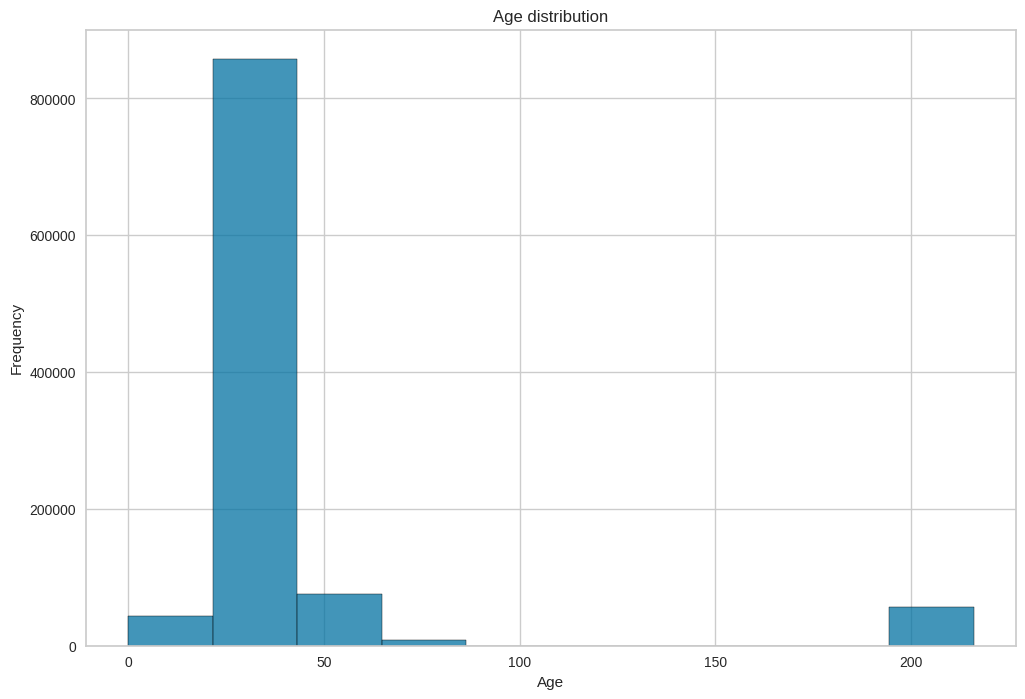

In [137]:
# observe age distribution
plt.figure(figsize = (12,8))
sns.histplot(df['age'], bins = 10, kde=False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.show()
plt.close("all")

In [138]:
df[df['age'] > 100]['CustomerDOB'].unique()

<DatetimeArray>
['1800-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [139]:
# nous constatons un age == 200 tres differents et decaler considerablement des autres ages
# ce qui constitue une valeur aberrante pour nos donnes
# il faut alors regler cette valeur aberrante
# pour cela, nous allons  definir une fonction pour remplacer cette outlier

In [140]:
# define function  to fix otlier age

def replace_age_outlier(df):
  DOB_threshold =1900  # fixer l'annee a 1900

  # selectionner toute annee < 1900 comme outlier ou valeur aberrante
  age_outliers = df[df['CustomerDOB'].dt.year < DOB_threshold].index

  # calcul de la moyenne de  toutes les annees qui ne ont pas aberrantes
  mean_DOB = df[~df.index.isin(age_outliers)]['CustomerDOB'].mean() #   ~ signifie une negation: not

  # on remplace l'age qui est une valeur aberrante par la moyenne des annees non aberrantes
  df.loc[age_outliers, 'CustomerDOB'] = mean_DOB

  return df


In [141]:
df = replace_age_outlier(df)

df = calculate_age(df)

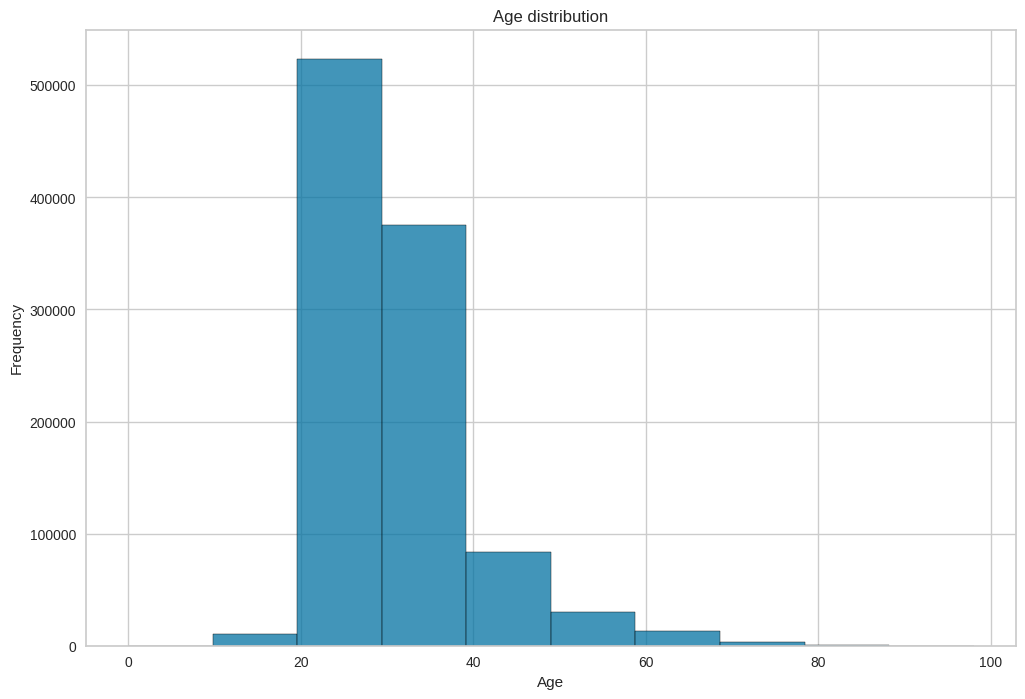

In [142]:
# observe age distribution
plt.figure(figsize = (12,8))
sns.histplot(df['age'], bins = 10, kde=False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.show()
plt.close("all")

**Gender**

In [143]:
df['CustGender'].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [144]:
# replace T in gender with M
df['CustGender'] = df['CustGender'].replace('T', 'M')

In [145]:
df['CustGender'].value_counts()

CustGender
M    760979
F    280635
Name: count, dtype: int64

**Location**

In [146]:
df['CustLocation'].value_counts()

CustLocation
MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: count, Length: 9275, dtype: int64

**Account balance**

In [147]:
df['CustAccountBalance'].sort_values(ascending=True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

**Transaction amount**

In [148]:
# selection des clients ayant un montant de transaction  == 0
df[df['TransactionAmount (INR)'] == 0].value_counts().sum()

820

In [149]:
# supprime toutes les lignes ou le montant de la transaction = 0
df.drop(df[df['TransactionAmount (INR)'] == 0].index.tolist(), axis = 0, inplace=True)

In [150]:
df[df['TransactionAmount (INR)'] == 0].value_counts().sum()

0

In [151]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


**Exploration Data Analyis**

In [152]:
df['CustomerID'].nunique()

878763

In [153]:
df.shape

(1040794, 10)

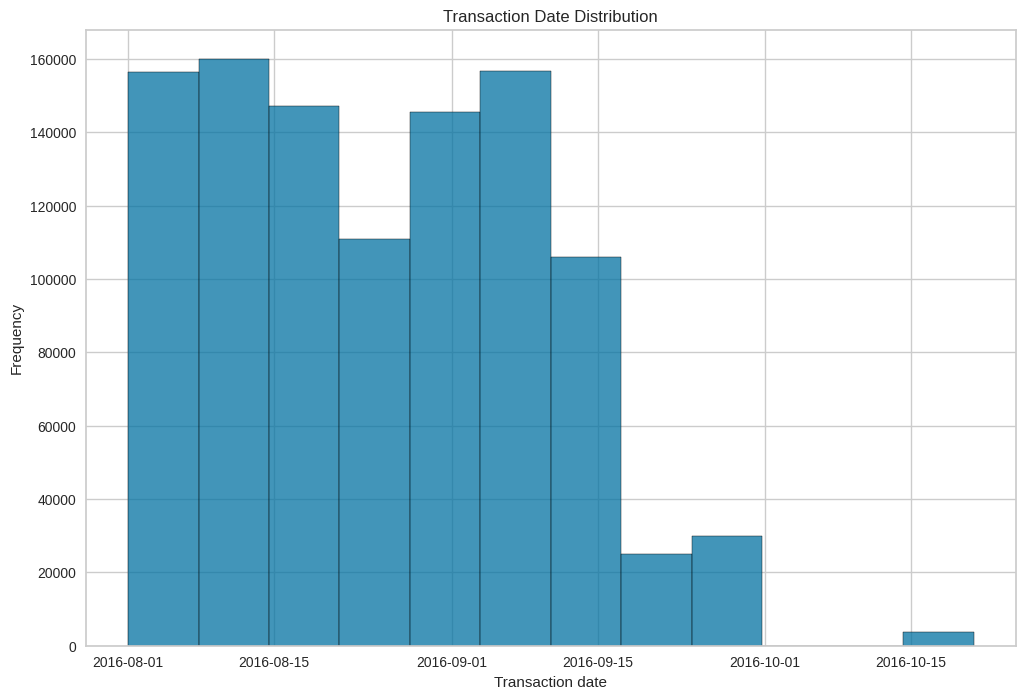

In [154]:
# plot the distribution for data  accross  the unique transaction date
plt.figure(figsize = (12, 8))
sns.histplot(df['TransactionDate'], bins= 12, kde = False)
plt.xlabel("Transaction date")
plt.ylabel("Frequency")
plt.title("Transaction Date Distribution")
plt.show()
plt.close('all')

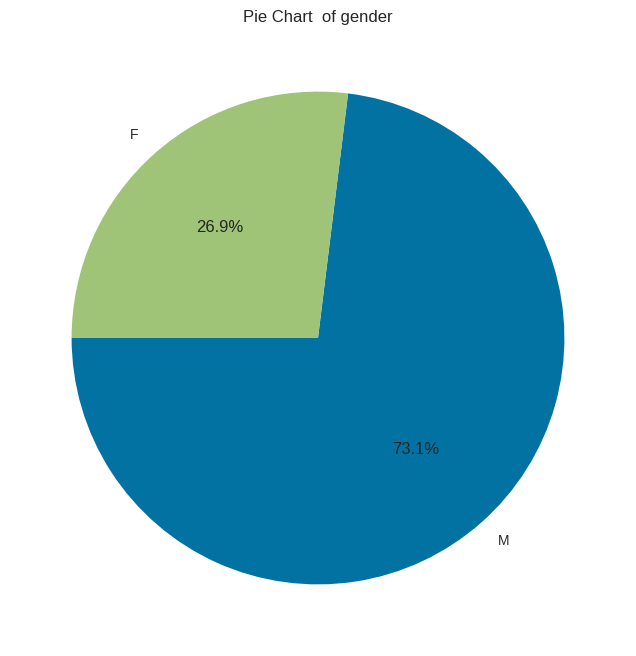

In [155]:
# Create a pie chart
plt.figure(figsize = (8,8))
gender_count = df['CustGender'].value_counts()
plt.pie(gender_count, labels= gender_count.index, startangle=180, autopct='%1.1f%%')
plt.title("Pie Chart  of gender")
plt.show()
plt.close('all')

**RFM Analysis**

In [156]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


**Recency ===> Nouveaute**

In [157]:
# otain the maximum date
day = df['TransactionDate'].max()

day

Timestamp('2016-10-21 00:00:00')

In [158]:
#calcule le nombre de jours écoulés depuis la dernière transaction pour chaque client dans le DataFrame df, en prenant en compte une date de référence day.
recency = df.groupby(['CustomerID']).agg({"TransactionDate" :lambda x: ((day - x.max()).days) + 1})

In [159]:
recency  # recency = nouveaute

,TransactionDate
CustomerID,
C1010011,26
C1010012,69
C1010014,76
C1010018,37
C1010024,65
...,...
C9099836,76
C9099877,37
C9099919,65


**Frequency ===> Frequence**

In [160]:
#Le code calcule la fréquence des transactions uniques pour chaque client
#en supprimant d'abord les transactions en double,
#puis en regroupant les transactions par client et
#en comptant le nombre de transactions uniques pour chaque client.

frequency = df.drop_duplicates(subset="TransactionID").groupby(['CustomerID'])[['TransactionID']].count()

In [161]:
frequency.head()

,TransactionID
CustomerID,
C1010011,2
C1010012,1
C1010014,2
C1010018,1
C1010024,1


**Monetary ===> Monétaire**

In [162]:
#Le code calcule le montant total dépensé par chaque client en regroupant les transactions par client et
#en calculant la somme des montants des transactions pour chaque client.

monetary  =  df.groupby(['CustomerID'])[['TransactionAmount (INR)']].sum()

In [163]:
monetary.head()


,TransactionAmount (INR)
CustomerID,
C1010011,5106.0
C1010012,1499.0
C1010014,1455.0
C1010018,30.0
C1010024,5000.0


**Create RFM table**

In [164]:
RFM_table = pd.concat([recency, frequency, monetary], axis =1)

In [165]:
RFM_table.head()

,TransactionDate,TransactionID,TransactionAmount (INR)
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


In [166]:
#  renommer les colonnes de notre table

RFM_table = RFM_table.rename(columns ={
    "TransactionDate": "recency",
    "TransactionID" : "frequency",
    "TransactionAmount (INR)" : "monetary"
})

In [167]:
RFM_table.head(3)

,recency,frequency,monetary
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0


**Explore RFM table**

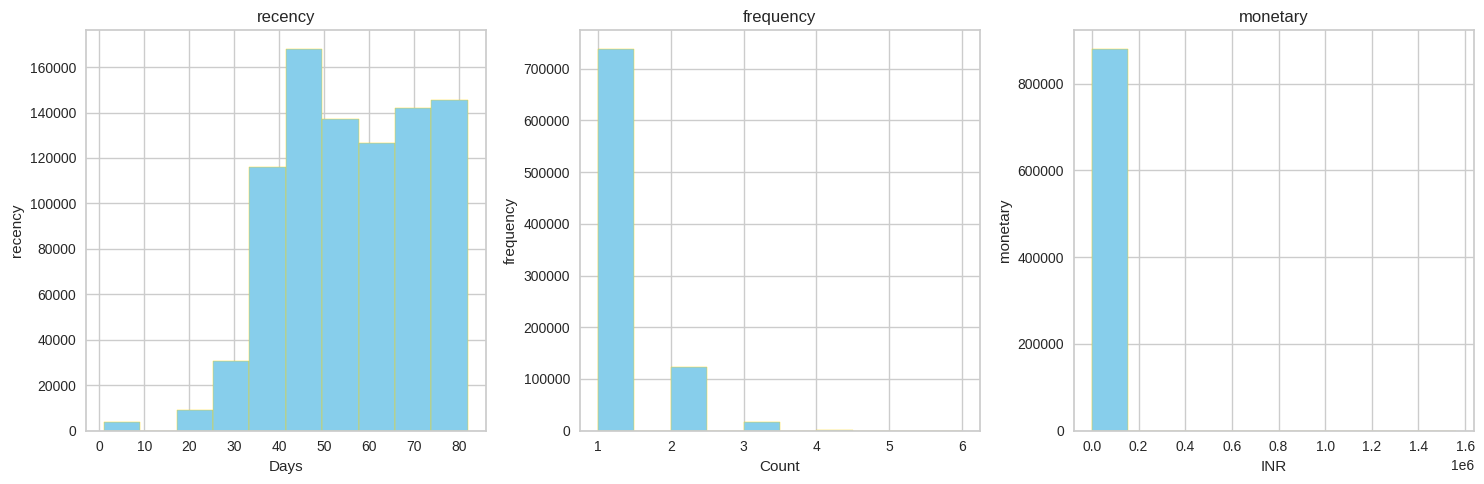

In [168]:

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

columns = ['recency', 'frequency', 'monetary']

for i, col in enumerate(columns):
  # creation d'un histogramme pour chaque colonne
  axis[i].hist(RFM_table[col], bins = 10, color = 'skyblue', edgecolor = 'gold')

  # titre de l'histogramme prenant le nom de la colonne
  axis[i].set_title(col)

  # nom de l'axe des abscisse
  axis[i].set_xlabel("Days" if col == 'recency' else "Count" if col == "frequency" else "INR")

  # nom des axes des ordonnees
  axis[i].set_ylabel(col)

# ajuster automatiquement les subplots (sous-parcelles)
plt.tight_layout()

# afficher les histogrammes
plt.show()

# fermer les histogrammes
plt.close('all')

In [169]:
#Pour l'histogramme monetaire, nous voysons que l'echelle des abscisses est sous forme de logarithme.
# il faut donc representer a nouveau ce histogramme en faisant une mise a l'echelle pour un meilleur appercu

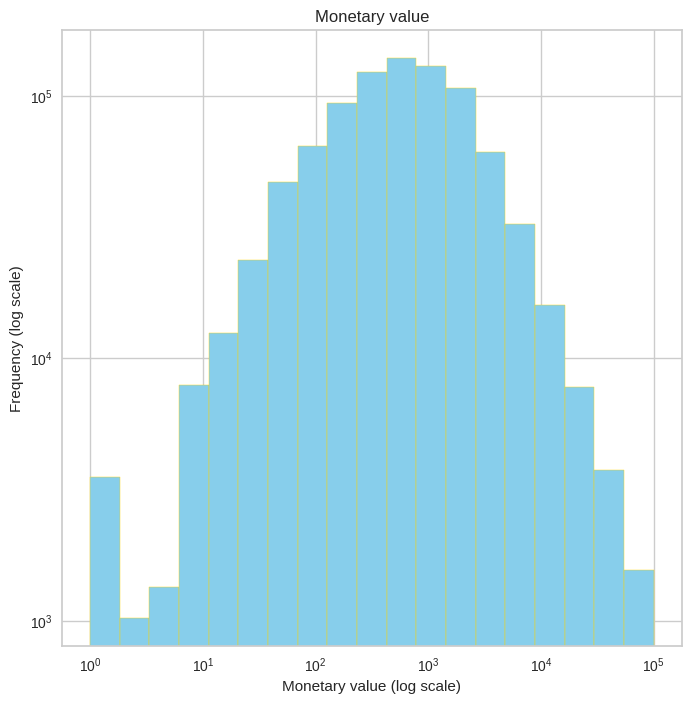

In [170]:
plt.figure(figsize = (8,8))

plt.hist(RFM_table['monetary'], bins = np.logspace(0,5,20), color = 'skyblue', edgecolor = 'gold')

plt.title('Monetary value')

plt.xlabel("Monetary value (log scale)")

plt.ylabel("Frequency (log scale)")

plt.xscale('log')

plt.yscale('log')

plt.show()

plt.close('all')

In [171]:
RFM_table.corr()

,recency,frequency,monetary
recency,1.000000,-0.223293,-0.020675
frequency,-0.223293,1.000000,0.097491
monetary,-0.020675,0.097491,1.000000


**Assign RFM score**

In [172]:
# calculate the quartile for each column
quantile = RFM_table[['recency', 'frequency' ,'monetary']].quantile(q = [0.25, 0.5, 0.75]).to_dict()

In [173]:
quantile

{'recency': {0.25: 44.0, 0.5: 56.0, 0.75: 69.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 200.0, 0.5: 534.0, 0.75: 1500.0}}

In [174]:
RFM_table['frequency'].value_counts()

frequency
1    736989
2    123500
3     16460
4      1659
5       141
6        14
Name: count, dtype: int64

In [175]:
# nous voyons qu'il ya un desequilibre dans la repartition des frequences

In [176]:
def assign_R_score(x, feature):
  if x <= quantile[feature][0.25]:
    return 4

  elif x <= quantile[feature][0.5]:
    return 3

  elif x <= quantile[feature][0.75]:
    return 3

  else:
    return 1


def assign_M_score(x, feature):
  if x <= quantile[feature][0.25]:
    return 1

  elif x <= quantile[feature][0.5]:
    return 2

  elif x <= quantile[feature][0.75]:
    return 3

  else:
    return 4


def custom_frequency_score(x):
  if x <= 3:
    return x

  else:
    return 4

In [177]:
RFM_table['R_score'] = RFM_table['recency'].apply(lambda x : assign_R_score(x, 'recency'))

RFM_table['F_score'] = RFM_table['frequency'].apply(custom_frequency_score)

RFM_table['M_score']  = RFM_table['monetary'].apply(lambda x : assign_M_score(x, 'monetary'))

In [178]:
RFM_table

,recency,frequency,monetary,R_score,F_score,M_score
CustomerID,,,,,,
C1010011,26,2,5106.0,4,2,4
C1010012,69,1,1499.0,3,1,3
C1010014,76,2,1455.0,1,2,3
C1010018,37,1,30.0,4,1,1
C1010024,65,1,5000.0,3,1,4
...,...,...,...,...,...,...
C9099836,76,1,691.0,1,1,3
C9099877,37,1,222.0,4,1,2
C9099919,65,1,126.0,3,1,1


In [179]:
# create total RFM score
RFM_table['RFM_score'] = RFM_table[["R_score",	"F_score",	"M_score"]].sum(axis = 1)

In [180]:
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
C1010011,26,2,5106.0,4,2,4,10
C1010012,69,1,1499.0,3,1,3,7
C1010014,76,2,1455.0,1,2,3,6
C1010018,37,1,30.0,4,1,1,6
C1010024,65,1,5000.0,3,1,4,8


In [181]:

RFM_table['RFM_group'] = RFM_table['R_score'].astype(str) + RFM_table['F_score'].astype(str) + RFM_table['M_score'].astype(str)

In [182]:
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,RFM_group
CustomerID,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424
C1010012,69,1,1499.0,3,1,3,7,313
C1010014,76,2,1455.0,1,2,3,6,123
C1010018,37,1,30.0,4,1,1,6,411
C1010024,65,1,5000.0,3,1,4,8,314


<ipython-input-183-d0ffeccf6761>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= RFM_table['RFM_score'], palette='viridis')


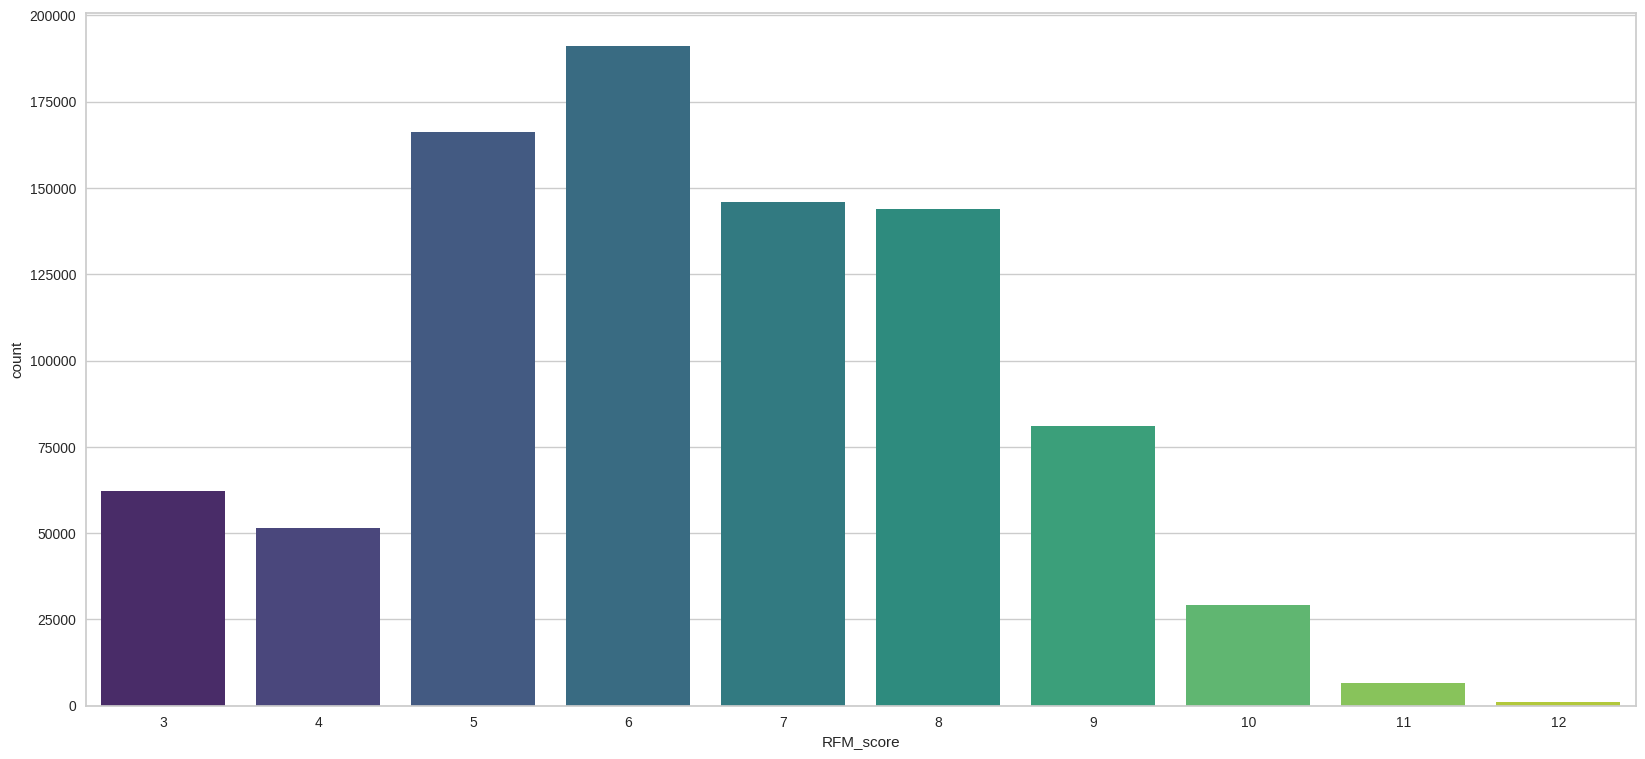

In [183]:
# visualize RFM score
plt.figure(figsize = (20, 9))
sns.countplot(x= RFM_table['RFM_score'], palette='viridis')
plt.show()
plt.close('all')

**12 - 10** for high valued customers

**9 - 6** for medium valued customers

**5 - 3** for low valued customers

In [184]:
# create a function to segment the RFM_score

def assign_segments(x):
  if x < 5:
    return "low"

  elif x < 9:
    return "medium"
  else:
    return "high"

In [185]:
RFM_table['segments'] = RFM_table['RFM_score'].apply(lambda x: assign_segments(x))

In [186]:
RFM_table

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,RFM_group,segments
CustomerID,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424,high
C1010012,69,1,1499.0,3,1,3,7,313,medium
C1010014,76,2,1455.0,1,2,3,6,123,medium
C1010018,37,1,30.0,4,1,1,6,411,medium
C1010024,65,1,5000.0,3,1,4,8,314,medium
...,...,...,...,...,...,...,...,...,...
C9099836,76,1,691.0,1,1,3,5,113,medium
C9099877,37,1,222.0,4,1,2,7,412,medium
C9099919,65,1,126.0,3,1,1,5,311,medium


<ipython-input-108-9bdcfdae861f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= RFM_table['segments'], palette='viridis')


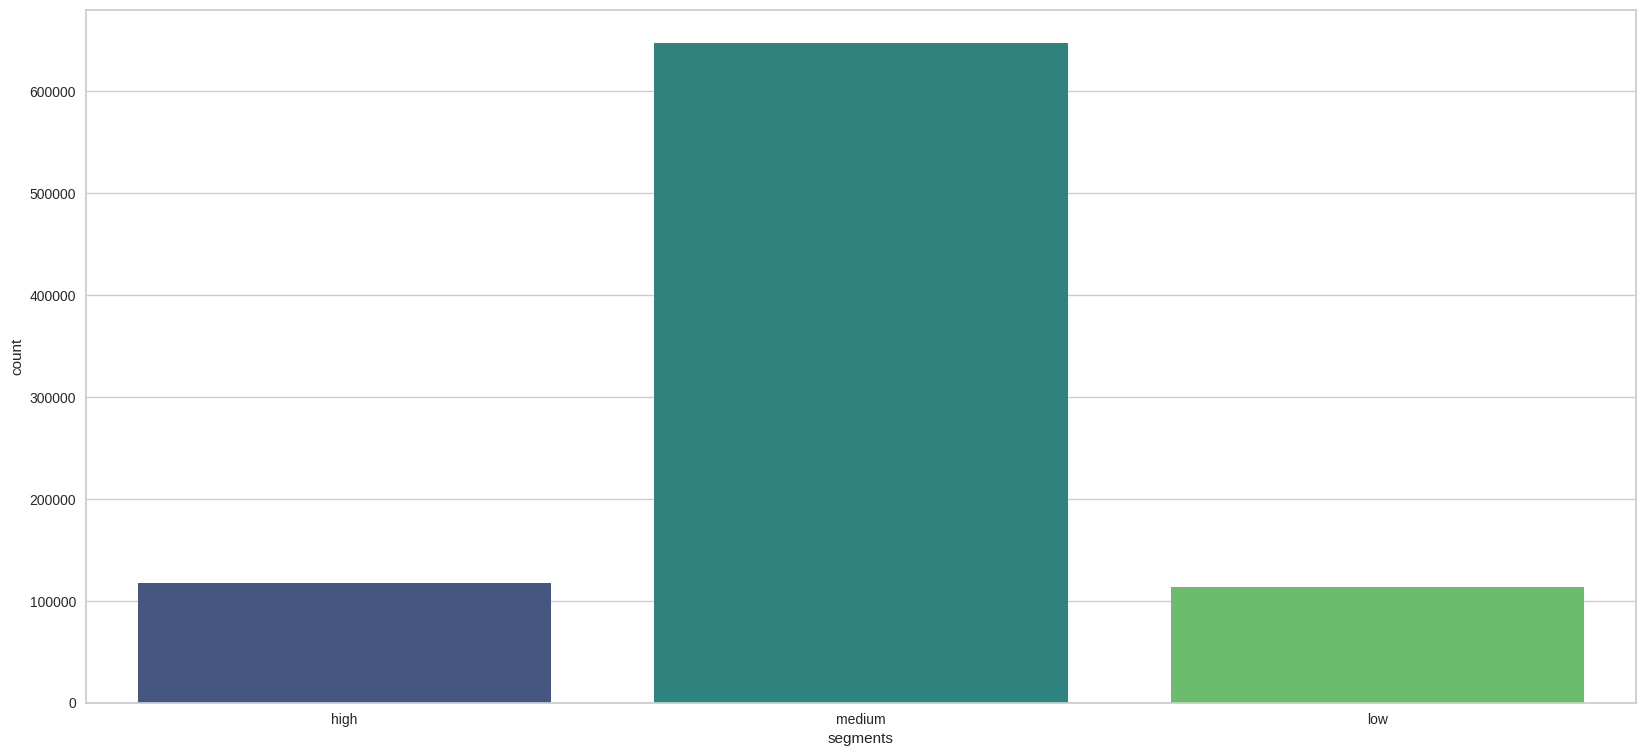

In [108]:
# visualize segments distribution

plt.figure(figsize = (20, 9))
sns.countplot(x= RFM_table['segments'], palette='viridis')
plt.show()
plt.close('all')

**Create weighted RFM score**

In [109]:
# this actually priotize recency more than frequency and monetary
# we want to segment our customers priotizing
RFM_table['weighted_score'] = (RFM_table['R_score'] * 2) + (RFM_table['F_score'] * 1) + (RFM_table['M_score'] * 1)

In [110]:
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,RFM_group,segments,weighed_score,weighted_score,weighted_segments
CustomerID,,,,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424,high,14,14,high
C1010012,69,1,1499.0,3,1,3,7,313,medium,10,10,high
C1010014,76,2,1455.0,1,2,3,6,123,medium,7,7,medium
C1010018,37,1,30.0,4,1,1,6,411,medium,10,10,high
C1010024,65,1,5000.0,3,1,4,8,314,medium,11,11,high


<ipython-input-111-bdc467f30acf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= RFM_table['weighted_score'], palette='viridis')


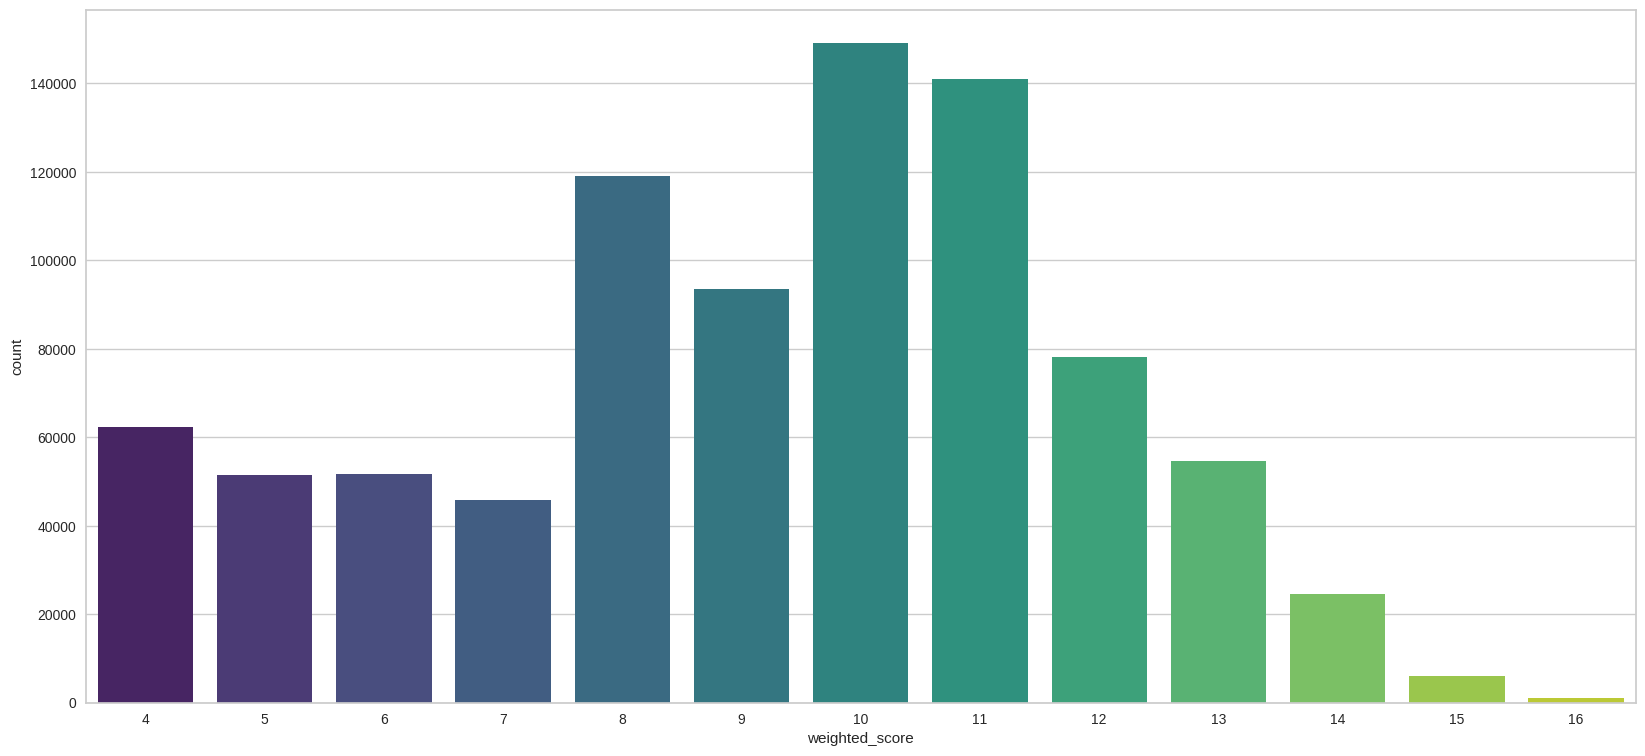

In [111]:
# visualize weighted score distribution

plt.figure(figsize = (20, 9))
sns.countplot(x= RFM_table['weighted_score'], palette='viridis')
plt.show()
plt.close('all')

In [112]:
RFM_table['weighted_segments'] = RFM_table['weighted_score'].apply(lambda x: assign_segments(x))

In [113]:
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,RFM_group,segments,weighed_score,weighted_score,weighted_segments
CustomerID,,,,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424,high,14,14,high
C1010012,69,1,1499.0,3,1,3,7,313,medium,10,10,high
C1010014,76,2,1455.0,1,2,3,6,123,medium,7,7,medium
C1010018,37,1,30.0,4,1,1,6,411,medium,10,10,high
C1010024,65,1,5000.0,3,1,4,8,314,medium,11,11,high


<ipython-input-114-2697172098af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= RFM_table['weighted_segments'], palette='viridis')


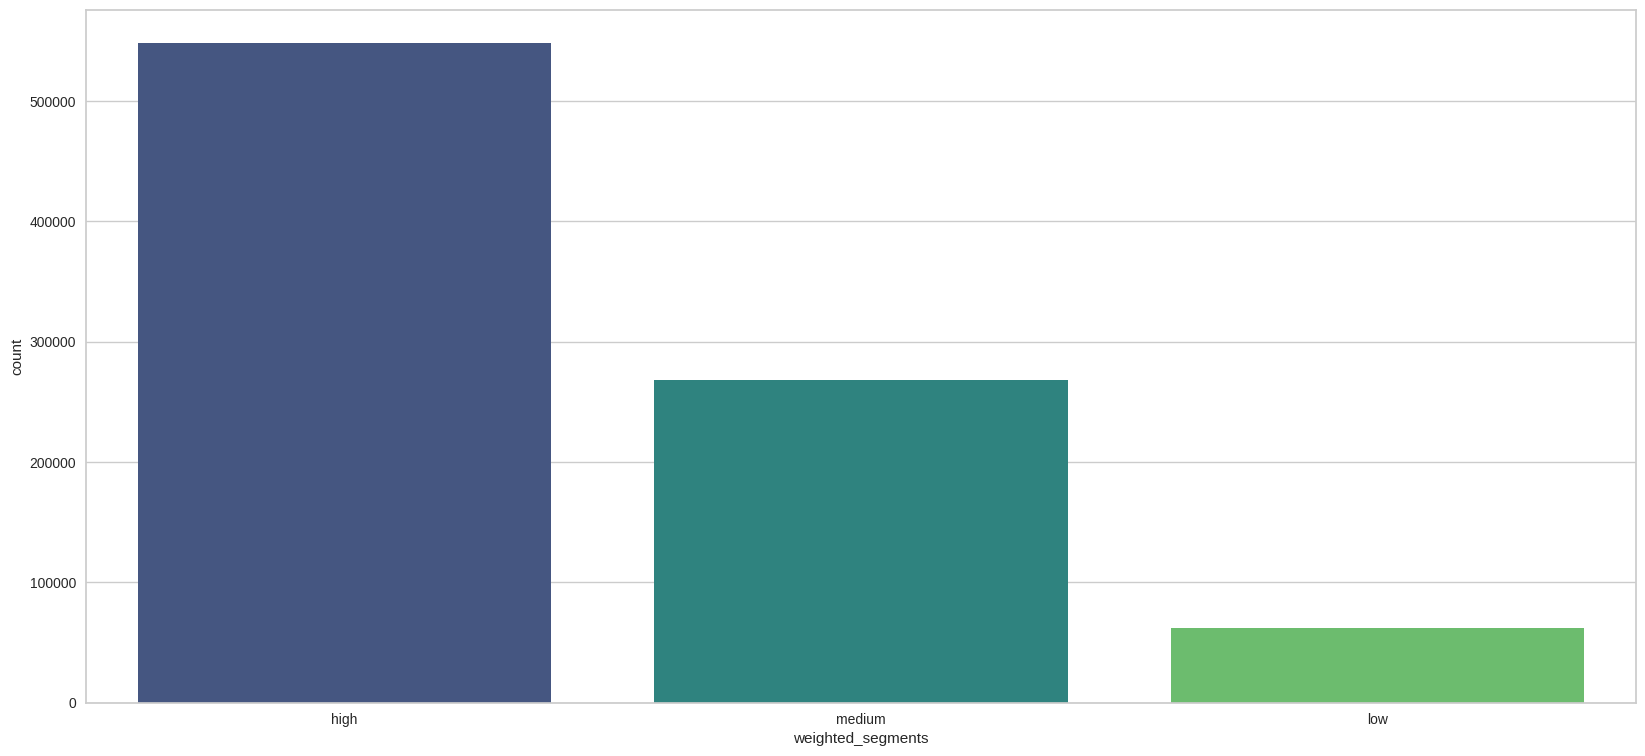

In [114]:
# visualize weighted seegments distribution

plt.figure(figsize = (20, 9))
sns.countplot(x= RFM_table['weighted_segments'], palette='viridis')
plt.show()
plt.close('all')

**Customers Segmentation with K-means**

Import libraries

In [115]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

**Create dataframe for clustering algorithm**

In [116]:
RFM_data = RFM_table.drop(['RFM_group', 'segments', 'weighted_score', 'weighted_segments'], axis = 1)

In [117]:
RFM_data.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,weighed_score
CustomerID,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,14
C1010012,69,1,1499.0,3,1,3,7,10
C1010014,76,2,1455.0,1,2,3,6,7
C1010018,37,1,30.0,4,1,1,6,10
C1010024,65,1,5000.0,3,1,4,8,11


**Scale dataframe**

In [192]:
# # Mise à l'échelle des données

scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFM_data)

In [193]:
scaled_data

array([[-1.99039095,  1.8173276 ,  0.45193522, ...,  1.34172808,
         1.9711732 ,  1.79806557],
       [ 0.83352617, -0.41084172, -0.04969314, ...,  0.45881674,
         0.31595241,  0.3027379 ],
       [ 1.2932336 ,  1.8173276 , -0.05581225, ...,  0.45881674,
        -0.23578785, -0.81875785],
       ...,
       [ 0.5708362 , -0.41084172, -0.24063734, ..., -1.30700594,
        -0.78752812, -0.44492593],
       [-0.08588871, -0.41084172, -0.25120672, ..., -1.30700594,
        -0.78752812, -0.44492593],
       [-1.92471846, -0.41084172, -0.13925473, ...,  0.45881674,
         0.86769268,  1.05040174]])

**Implement clustering algorithm**

In [190]:
# Initialisation du modèle KMeans

model = KMeans(random_state = 1)

**Using the distortion metric**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=1),
                 k=(2, 10))

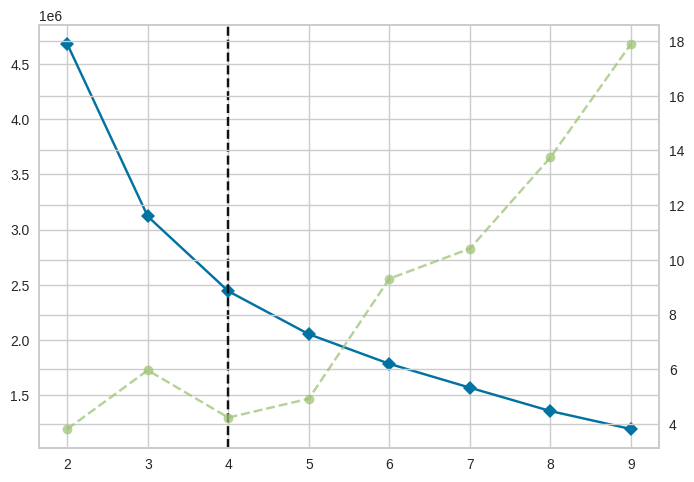

In [194]:
# Création et ajustement du visualiseur de coude

plot_model = KElbowVisualizer(model, k = (2, 10), metric='distortion', timing = False)

plot_model.fit(scaled_data)



**Using calinski-harabasz metric**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=1),
                 k=(2, 10), metric='calinski_harabasz')

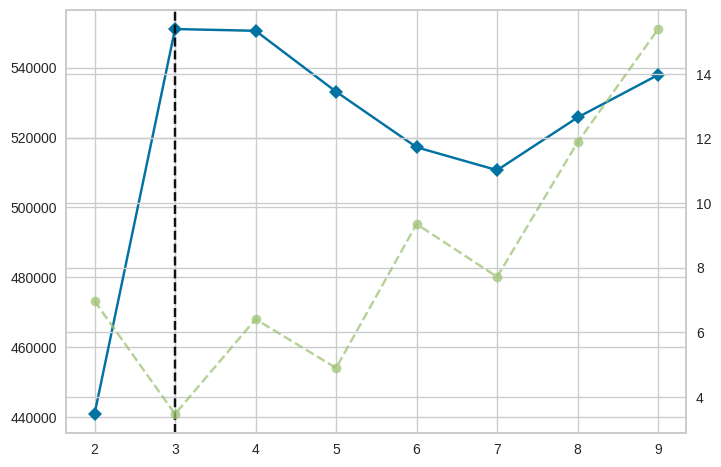

In [195]:
plot_model_2 = KElbowVisualizer(model, k = (2, 10), metric='calinski_harabasz', timing = False)

plot_model_2.fit(scaled_data)

**Cluster assigment**

In [197]:

# Initialisation du modèle KMeans avec 3 clusters et une graine aléatoire fixe pour assurer la reproductibilité des résultats
final_model = KMeans(n_clusters=3, random_state=1)

# Ajustement du modèle KMeans aux données mises à l'échelle
# Cela signifie que le modèle va trouver les 3 clusters dans les données fournies
final_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [199]:
# Obtenir les labels des clusters assignés pour chaque point de données
# Cela signifie que chaque point de données se voit attribuer un numéro de cluster (0, 1 ou 2 dans ce cas)
cluster_assignment = final_model.labels_

# Affichage des labels des clusters
cluster_assignment


array([2, 1, 0, ..., 1, 1, 1], dtype=int32)

In [200]:
RFM_data['cluster'] = cluster_assignment

In [201]:
RFM_data

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,weighed_score,cluster
CustomerID,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,14,2
C1010012,69,1,1499.0,3,1,3,7,10,1
C1010014,76,2,1455.0,1,2,3,6,7,0
C1010018,37,1,30.0,4,1,1,6,10,1
C1010024,65,1,5000.0,3,1,4,8,11,1
...,...,...,...,...,...,...,...,...,...
C9099836,76,1,691.0,1,1,3,5,6,0
C9099877,37,1,222.0,4,1,2,7,11,1
C9099919,65,1,126.0,3,1,1,5,8,1


**Visualize cluster**

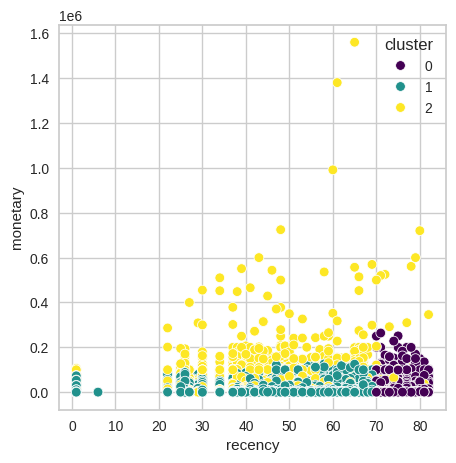

In [207]:
plt.figure(figsize = (5, 5))
sns.scatterplot(data=RFM_data, x= RFM_data['recency'], y=RFM_data['monetary'] , hue=RFM_data['cluster'], palette='viridis')
plt.show()
plt.close('all')

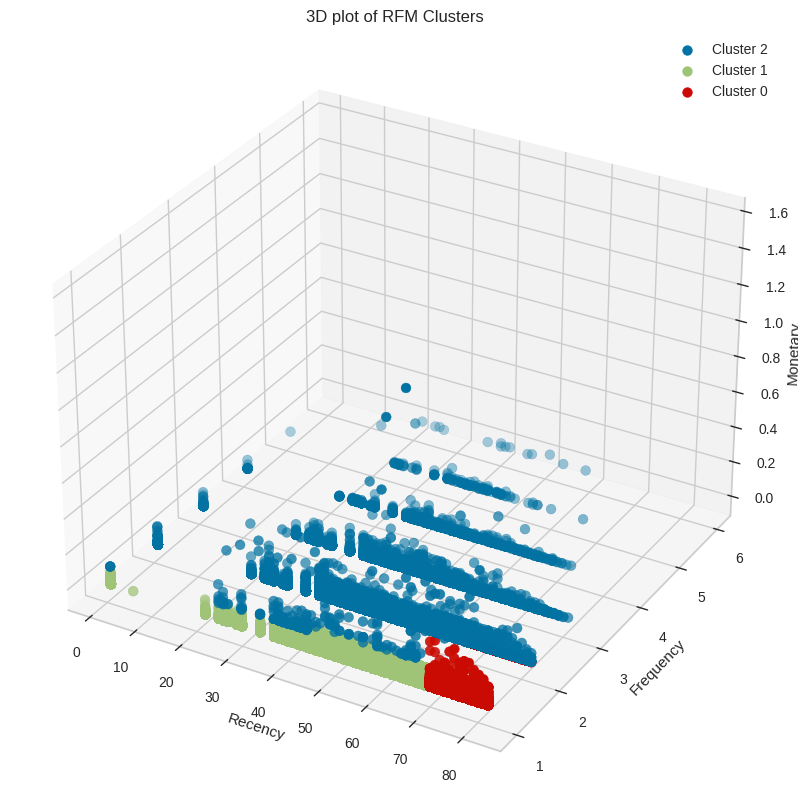

In [206]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
color = ['b', 'g', 'r']
for cluster, color in zip(RFM_data['cluster'].unique(), color):
  cluster_data = RFM_data[RFM_data['cluster'] == cluster]
  ax.scatter(cluster_data['recency'], cluster_data['frequency'], cluster_data['monetary'], c=color, s= 50, marker='o', label=f'Cluster {cluster}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D plot of RFM Clusters')
ax.legend()
plt.show()
plt.close('all')

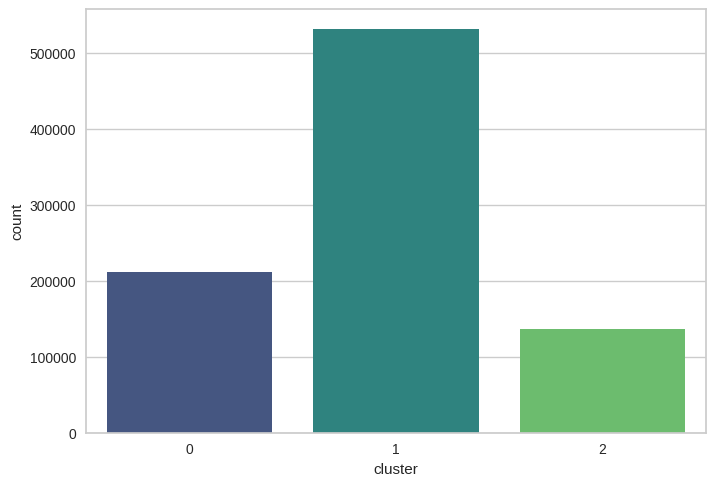

In [211]:
import warnings
warnings.filterwarnings('ignore')

sns.countplot( x=RFM_data['cluster'], palette='viridis')
plt.xlabel('cluster'),
plt.ylabel('count')
plt.show()
plt.close('all')


In [212]:
for cluster in RFM_data['cluster'].unique():
  print(f"Cluster {cluster}:")
  print(RFM_data[RFM_data['cluster'] == cluster].describe())
  #cluster_data = RFM_data[RFM_data['cluster'] == cluster]

Cluster 2:
             recency      frequency      monetary        R_score  \
count  136689.000000  136689.000000  1.366890e+05  136689.000000   
mean       47.603692       2.146222  3.802797e+03       3.361068   
std        12.425539       0.400607  1.407672e+04       0.666028   
min         1.000000       1.000000  2.000000e+00       1.000000   
25%        40.000000       2.000000  6.770000e+02       3.000000   
50%        47.000000       2.000000  1.500000e+03       3.000000   
75%        56.000000       2.000000  3.152000e+03       4.000000   
max        82.000000       6.000000  1.560035e+06       4.000000   

             F_score        M_score      RFM_score  weighed_score   cluster  
count  136689.000000  136689.000000  136689.000000  136689.000000  136689.0  
mean        2.144986       3.264323       8.770377      12.131444       2.0  
std         0.393012       0.870071       1.178348       1.627006       0.0  
min         1.000000       1.000000       5.000000       6.00000

In [214]:
# Filtrer les données pour obtenir uniquement les points appartenant au cluster 0
cluster_0 = RFM_data[RFM_data['cluster'] == 0]

# Filtrer les données pour obtenir uniquement les points appartenant au cluster 1
cluster_1 = RFM_data[RFM_data['cluster'] == 1]

# Filtrer les données pour obtenir uniquement les points appartenant au cluster 2
cluster_2 = RFM_data[RFM_data['cluster'] == 2]


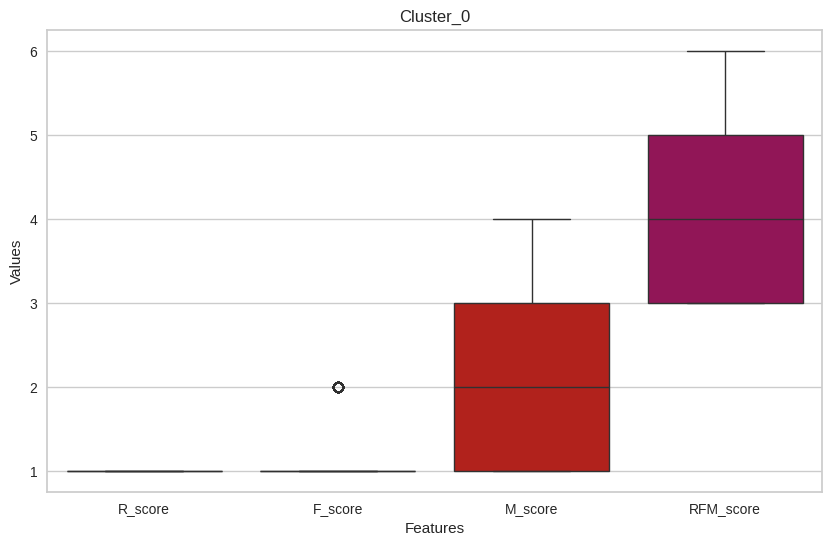

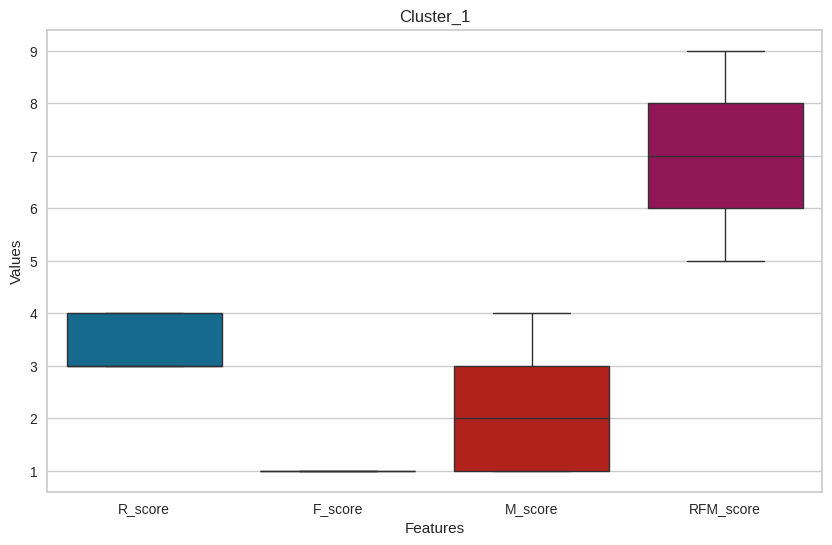

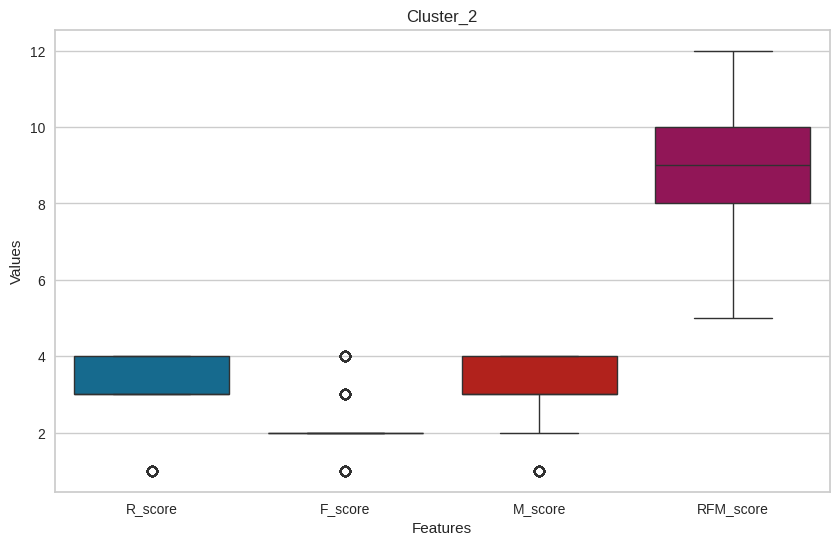

In [218]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = cluster_0[['R_score', 'F_score', 'M_score', 'RFM_score']])
plt.title(f"Cluster_0")
plt.ylabel("Values")
plt.xlabel("Features")
plt.show()


plt.figure(figsize = (10, 6))
sns.boxplot(data = cluster_1[['R_score', 'F_score', 'M_score', 'RFM_score']])
plt.title(f"Cluster_1")
plt.ylabel("Values")
plt.xlabel("Features")
plt.show()

plt.figure(figsize = (10, 6))
sns.boxplot(data = cluster_2[['R_score', 'F_score', 'M_score', 'RFM_score']])
plt.title(f"Cluster_2")
plt.ylabel("Values")
plt.xlabel("Features")
plt.show()
plt.close('all')





**Cluster description**

• Cluster 0:

  ■ ALL customers in this cluster have Low Recency score 1
  
  ■ All customers have low frequency score of 1 with a few outliers with 2 F-score

  
  ■ 50% of customers have monetary score are between 1 to 2 and the other 50% has M-score from 2 to 3. The average M-score of this cluster is 2

  ■ 75% of customers have RFM score between 3 to 6



• Cluster 1:

  ■ All customers have very high recency score between 3 to 4

  ■ All customers have low frequency score of 1

  ■ 50% of customers have monetary score are between 1 to 2 and the other 50% has M-score from 2 to 4. The average M-score of this cluster is 2. Same as cluster 0

  ■ 75% of customers have RFM score between 6 to 8



• Cluster 2:


  ■ 75% of customers have high recency score between 3 to 4 with with a outlier

  ■ All customers have fairly high frequency score of 2 with a few outliers having F-score of 1, 3 and 4

  ■ Almost all customers have high monetary score between 2 and 4 with a few outliers having an M-score of 1

  ■ 75% of customers have high RFM score between 8 to 10 and the remaining 25% have an RFM_score between 5 to 8